In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [3]:
raw_df = pd.read_csv('Analysis/005930.KS.csv')
raw_df.head()

Date     Open     High      Low    Close     Adj Close      Volume
0  2016-09-01  31660.0  31760.0  31260.0  31740.0  27374.837891  18790150.0
1  2016-09-02  31900.0  32260.0  31760.0  31940.0  27547.332031   8153000.0
2  2016-09-05  31800.0  32300.0  31700.0  32120.0  27702.576172   8383800.0
3  2016-09-06  32140.0  32900.0  31940.0  32860.0  28340.804688   7660150.0
4  2016-09-07  32960.0  33040.0  32420.0  32420.0  27961.316406   9591850.0

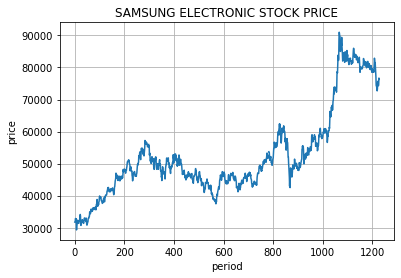

In [4]:
plt.title('SAMSUNG ELECTRONIC STOCK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(raw_df['Close'], label='Close')

plt.show()

In [5]:
# 통계정보 확인
raw_df.describe()

Open          High           Low         Close     Adj Close  \
count   1223.000000   1223.000000   1223.000000   1223.000000   1223.000000   
mean   52589.493050  53118.364677  52078.143908  52590.400654  49119.375954   
std    13810.503619  13922.697447  13694.259077  13777.460640  15056.797420   
min    29800.000000  30120.000000  29120.000000  29300.000000  25270.406250   
25%    44500.000000  45000.000000  44150.000000  44650.000000  40578.593750   
50%    48900.000000  49260.000000  48300.000000  48840.000000  44333.996094   
75%    56390.000000  56960.000000  55840.000000  56400.000000  53428.468750   
max    90300.000000  96800.000000  89500.000000  91000.000000  90198.078125   

             Volume  
count  1.223000e+03  
mean   1.499712e+07  
std    8.516194e+06  
min    0.000000e+00  
25%    9.529673e+06  
50%    1.274900e+07  
75%    1.795942e+07  
max    9.030618e+07

In [6]:
# Missing Data 확인
raw_df.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [7]:
# 최소값이 0인 column 체크
for col in raw_df.columns:
    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

Volume <class 'str'>


In [8]:
raw_df.loc[raw_df['Volume']==0]

Date     Open     High      Low    Close     Adj Close  Volume
263  2017-09-26  53620.0  53620.0  53620.0  53620.0  47260.214844     0.0
404  2018-04-30  53000.0  53000.0  53000.0  53000.0  47608.335938     0.0
405  2018-05-02  53000.0  53000.0  53000.0  53000.0  47608.335938     0.0
406  2018-05-03  53000.0  53000.0  53000.0  53000.0  47608.335938     0.0
858  2020-03-09  56500.0  56500.0  56500.0  56500.0  53537.441406     0.0
861  2020-03-12  52100.0  52100.0  52100.0  52100.0  49368.152344     0.0

In [9]:
# 각 column에 0 몇개인지 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 6


In [10]:
# 먼저 0 을 NaN으로 바꾼후, Missing Data 처리
raw_df['Volume'] = raw_df['Volume'].replace(0, np.nan)

# 각 column에 0 몇개인지 확인
for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Date: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0


In [11]:
# Missing Data 확인
raw_df.isnull().sum()

Date          0
Open          5
High          5
Low           5
Close         5
Adj Close     5
Volume       11
dtype: int64

In [12]:
raw_df.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [13]:
raw_df.loc[raw_df['Volume'].isna()]

Date     Open     High      Low    Close     Adj Close  Volume
263  2017-09-26  53620.0  53620.0  53620.0  53620.0  47260.214844     NaN
294  2017-11-16      NaN      NaN      NaN      NaN           NaN     NaN
299  2017-11-23      NaN      NaN      NaN      NaN           NaN     NaN
323  2018-01-02      NaN      NaN      NaN      NaN           NaN     NaN
404  2018-04-30  53000.0  53000.0  53000.0  53000.0  47608.335938     NaN
405  2018-05-02  53000.0  53000.0  53000.0  53000.0  47608.335938     NaN
406  2018-05-03  53000.0  53000.0  53000.0  53000.0  47608.335938     NaN
536  2018-11-15      NaN      NaN      NaN      NaN           NaN     NaN
781  2019-11-14      NaN      NaN      NaN      NaN           NaN     NaN
858  2020-03-09  56500.0  56500.0  56500.0  56500.0  53537.441406     NaN
861  2020-03-12  52100.0  52100.0  52100.0  52100.0  49368.152344     NaN

In [14]:
# missing data 처리
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
# 정규화 (Date 제외한 모든 수치부분 정규화)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
print(scaled_df)

          Open      High       Low     Close  Adj Close    Volume
0     0.030744  0.024595  0.035442  0.039546   0.032412  0.167447
1     0.034711  0.032094  0.043723  0.042788   0.035069  0.043614
2     0.033058  0.032693  0.042729  0.045705   0.037460  0.046301
3     0.038678  0.041692  0.046704  0.057699   0.047290  0.037877
4     0.052231  0.043791  0.054654  0.050567   0.041445  0.060365
...        ...       ...       ...       ...        ...       ...
1212  0.765289  0.691062  0.753230  0.734198   0.759762  0.142782
1213  0.735537  0.673065  0.739980  0.729335   0.755142  0.125335
1214  0.753719  0.680564  0.746605  0.734198   0.759762  0.096397
1215  0.745455  0.698560  0.748261  0.768233   0.792106  0.235436
1216  0.775207  0.701560  0.774760  0.761750   0.785945  0.038931

[1217 rows x 6 columns]


In [16]:
# 입력 파라미터 feature, label => numpy type
def make_sequence_dataset(feature, label, window_size):
    
    feature_list = []    # 생성될 feature list
    label_list = []      # 생성될 label list
    
    for i in range(len(feature) - window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list), np.array(label_list)

In [17]:
# feature_df, label_df 생성
feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
label_cols = ['Close']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [18]:
# DataFrame => Numpy 변환
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(1217, 6) (1217, 1)


In [19]:
# 시계열 데이터 생성(make_sequence_dataset)
window_size = 40
X, Y = make_sequence_dataset(feature_np, label_np, window_size)
print(X.shape, Y.shape)

(1177, 40, 6) (1177, 1)


In [21]:
# 학습데이터, 테스트데이터 생성
split = int(len(X)*0.7)

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(823, 40, 6) (823, 1)
(354, 40, 6) (354, 1)


In [22]:
# 모델 구축 및 컴파일
model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(1, activation='linear'))

In [23]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               69120     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 69,249
Trainable params: 69,249
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델 학습(EarlyStopping 적용)
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         epochs=100, batch_size=16,
         callbacks=[early_stop])

Epoch 1/100
52/52 [==============================] - 2s 22ms/step - loss: 0.0035 - mae: 0.0397 - val_loss: 0.0047 - val_mae: 0.0563
Epoch 2/100
52/52 [==============================] - 1s 17ms/step - loss: 5.0897e-04 - mae: 0.0175 - val_loss: 0.0017 - val_mae: 0.0301
Epoch 3/100
52/52 [==============================] - 1s 17ms/step - loss: 4.6988e-04 - mae: 0.0168 - val_loss: 0.0014 - val_mae: 0.0265
Epoch 4/100
52/52 [==============================] - 1s 17ms/step - loss: 4.3810e-04 - mae: 0.0163 - val_loss: 8.3683e-04 - val_mae: 0.0206
Epoch 5/100
52/52 [==============================] - 1s 17ms/step - loss: 4.5445e-04 - mae: 0.0166 - val_loss: 7.7923e-04 - val_mae: 0.0200
Epoch 6/100
52/52 [==============================] - 1s 17ms/step - loss: 4.8294e-04 - mae: 0.0170 - val_loss: 0.0014 - val_mae: 0.0276
Epoch 7/100
52/52 [==============================] - 1s 17ms/step - loss: 3.8739e-04 - mae: 0.0152 - val_loss: 8.6696e-04 - val_mae: 0.0201
Epoch 8/100
52/52 [=====================

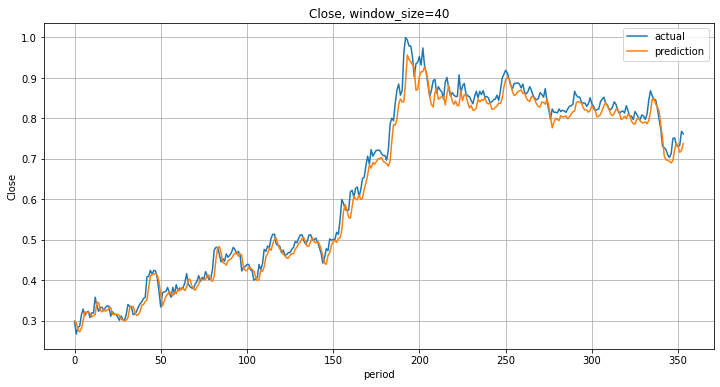

In [26]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('Close, window_size=40')
plt.ylabel('Close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [27]:
# 평균절대값백분율오차계산 (MAPE)
print(np.sum(abs(y_test-pred)/y_test) /len(x_test))

0.03031799738176523
